In [0]:
import pandas as pd
import numpy as np

In [0]:
# 3. Creating Series from Python Lists
series = pd.Series([4,5,6]) # int64
series = pd.Series([4.0,5.0,6.0,7.0]) # float64
series = pd.Series([True,False,True]) # bool
series = pd.Series(['1','2','3']) # object
series = pd.Series([1,2,3.0,4.0,'Blaise']) # object because of the string
series = pd.Series([1,2,3.0,4.0,]) # float64 because of the floats
series = pd.Series([1,3.0,None,np.nan]) # float64, None becomes NaN because of the float
series = pd.Series([1,3.0,None,np.nan,'Blaise']) # object because of the string
series = pd.Series([1,2,3],dtype=np.float32) # forcing values to become float32
print(series)

0    1.0
1    2.0
2    3.0
dtype: float32


In [0]:
# 4. Creating Series from dictionaries, lists with indexes, and numpy arrays
series = pd.Series({'a':1,'b':2,'c':3}) # int64 with a,b,c labels
series = pd.Series({'a':True,'b':False,'c':False}) # bool with a,b,c labels
series = pd.Series({'a':1.0,'b':2.0,'c':np.nan}) # float64 with a,b,c labels
series = pd.Series({'a':'1','b':'2','c':'3'}) # object with a,b,c labels
series = pd.Series([1,2,3], index=['a','b','c']) # int64 with a,b,c labels
series = pd.Series(10, index=[0,1,2,3,4]) # series with 5 x 10s and 0,1,2,3,4 labels
series = pd.Series(10, index=['a','b','c','d','e']) # series with 5 x 10s and a,b,c,d,e labels
# Numpy
series = pd.Series(np.array([1,2,3]))
numpy_series = series.to_numpy() # converts series to a numpy array
nump_series = np.asarray(series) # converts series to a numpy array (same as above)
print(type(series))  # Pandas Series
print(type(numpy_series)) # Numpy array
print(numpy_series)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[1 2 3]


In [0]:
# 5. Date ranges and DateTime dtype
dates = pd.date_range('20200301',periods=10) # 10 days starting on March 1, 2020
dates = pd.date_range('20200301',periods=10,freq='4H') # 10 periods spread 4 hours apart starting on March 1, 2020
dates = pd.date_range('20200301','20200302',freq='4H') # n Periods spread 4 hours apart starting on March 1, 2020 and ending on March 2, 2020
dates = pd.date_range('20200301','20200302',periods=10) # 10 Periods starting on March 1, 2020 and ending on March 2, 2020

dates = pd.date_range('20200301',periods=5)
series = pd.Series([1,2,3,4,5], index=dates) # Values 1,2,3,4,5 but using dates as indexes

date_series = pd.Series(dates) # Date range as a Series
days = date_series.dt.year # Series of just the years from the date range above

0    2020
1    2020
2    2020
3    2020
4    2020
dtype: int64


In [0]:
# 6. Getting single elements from Series
series = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])

first = series[0] # Returns 1
first = series['a'] # Returns 1
last = series[4] # Returns 5
last = series['e'] # Returns 5
# last = series[-1:] # Returns Series containing 'e':5

# tenth = series[9] # Throws error, index does not exist
# tenth = series['j'] # Throws error, index does not exist
tenth = series.get(9) # Returns None, does not throw error
tenth = series.get('j') # Returns None, does not throw error
tenth = series.get('j',default=0) # Returns 0

0


In [0]:
# 7. Getting elements from Series via slicing
series = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])

last = series[-1:] # Returns Series containing 'e':5
three = series[:3] # Returns first 3 elements
three = series[2:] # Returns last 3 elements
three = series[1:4] # Returns middle 3 elements
three = series[[0,1,2]] # Returns first 3 elements
three = series[['a','b','c']] # Returns first 3 elements
shuffled = series[[4,1,3,0,2]] # Returns shuffled series in the order specified
shuffled = series[['b','a','e','c','d']] # Returns shuffled series in the order specified
gt3 = series[series > 3] # Returns Series of all the values > 3 (4, 5)
gt3 = series[series > 6] # Returns Series of all the values > 6 (empty Series)

indexes = series.index # Returns Index data structure containing the index labels
values = series.values # Returns numpy array of values
pandas_array = series.array # Returns Pandas Array data structure containing just the values

<PandasArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64


In [0]:
# 8. Getting Series Properties
series = pd.Series([1,2,3,4,5,4,2,3,1,1,])

series_count = series.count() # Number of elements
series_max = series.max() # Max value (single value)
series_min = series.min() # Min value (single value)
description = series.describe() # Gives several properties such as count, max, min, mean, etc.
series_sum = series.sum() # Returns single as sum of all values
n_largest = series.nlargest(2) # Return a Series with the indexes and values of the n largest values
n_smallest = series.nsmallest(2) # Return a Series with the indexes and values of the n smallest values

max_index = series.idxmax() # Returns the index of the max value (single value)
min_index = series.idxmin() # Returns the index of the min value (single value)

histogram = series.value_counts() # Returns a Series with indexes as elements and values as counts of those elements

series = pd.Series(['a','b','c'])
description = series.describe() # Returns info such as # of unique elements, most frequent, etc.
series = pd.Series([True, False, False, True, True])
description = series.describe() # Returns info such as # of unique elements, most frequent, etc.
all_true = series.all() # Returns true if all values are true
any_true = series.any() # Returns true if any of the values are true

False
True


In [0]:
# 9. Adding elements to and removing elements from Series
series = pd.Series({'a':1,'b':2,'c':3,'d':4,'e':5})
# Adding
series['f'] = 6 # Assigns new index of 'f' and new value of 6 to series
new_series = series.append(pd.Series({'g':7,'h':8,'i':9})) # Adds series to the end of the original series but returns a new one rather than modifying the original series
# Removing
del series['a'] # Removes an index and value in the original series
new_series = series.drop(['e','f']) # Removes the indexes and values from the original series but returns a new series
popped = series.pop('b') # Removes an index and value from the original series, changes the original series, and returns the removed value

c    3
d    4
e    5
f    6
dtype: int64
2


In [0]:
# 10. Modifying and restructuring Series
series = pd.Series({'a':1,'b':2,'c':3,'d':4,'e':5})
# Modifying elements
series[0] = 0 # Reassigns the first value to 0
series['e'] = 6 # Reassigns the last value to 0
series[:3] = 10 # Reassigns the indexes 0,1,2 to contain the value 10
series[:3] = [11,12,13] # Reassigns index 0 to 11, index 1 to 12, index 2 to 13
# series[:3] = [11,12,13,14] # Not allowed, list has to be of the same length as the slice
series = series.rename('Series 1') # Reassigns the name of the Series
series = series.rename(str.upper) # Changes the index labels
series = series.reindex(['B','A','E','C','D']) # Shuffles the Series
series = series.reindex(['B','A','E','C','D','F','Z']) # Shuffles the Series and adds labels F and Z with NaN values

B    12.0
A    11.0
E     6.0
C    13.0
D     4.0
F     NaN
Z     NaN
Name: Series 1, dtype: float64


In [0]:
# 11. Series Operations
series = pd.Series([1,2,3,4,np.nan])
# Arithmetic
new_series = series + 5 # Adds 5 to all elements
new_series = series.mul(2) # Multiplies all elements by 2
new_series = series.mul(2, fill_value=1) # Fills in all NaNs with 1 and then multiplies all elements by 2 
# Applies a function to multiply each element by 2 and add 5
def f(x):
  return (2*x)+5
new_series = series.apply(f)
# Casts all elements in the Series to float16 type
new_series = series.astype(np.float16)
new_series = series.astype('float16')

series = pd.Series([3,2,4,1,5], index=['a','z','r','t','g'])
new_series = series.sort_index(ascending=False) # Sorts Series by index label from greatest to least
new_series = series.sort_index(kind='quicksort') # Sorts Series by index label with quicksort algorithm
new_series = series.sort_values() # Sorts Series by values instead of index labels

print(new_series)

t    1
z    2
a    3
r    4
g    5
dtype: int64


In [0]:
# 12. Comparisons and Iterations
series_1 = pd.Series([1,2,3,4,5,np.nan])
series_2 = pd.Series([5,2,4,1,np.nan,3])
# Comparisons
comp = series_1 > series_2 # Compares elements at matching indexes across Series and returns a Series of True/False values, can also do > >= < <= == !=
comp = series_1.eq(series_2,fill_value=3) # Same as above but can sub in values, can also do .eq .ne .gt .ge .lt .le
comp = series_1.equals(series_2) # Returns True if all elements are the same
comp = series_1[0] > series_2[3] # Compares a single element to another
comp = series_1 >= 5 # Compares all values to a single value, returns a Series of True/ False values
# Iteration
is_in = 4 in series_1 # Returns True if series_1 contains the value 4
# for key, value in series_1.items(): # Iterates through a list of tuples of key/index value pairs
#   print(key)
#   print(value)
for value in series_1: # Iterates through just the values
  print(value)

1.0
2.0
3.0
4.0
5.0
nan


In [0]:
# 13. Creating Pandas DataFrames with Python lists and scalar values
df = pd.DataFrame([1,2,3], dtype=np.float16) # List of Ints, creates a DataFrame with 3 rows and 1 column
df = pd.DataFrame(['1','2','3']) # List of objects
df = pd.DataFrame([False, True, False]) # List of Bools
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]]) # Creates a DataFrame with 3 rows and 3 columns
df = pd.DataFrame([[1,2,3,4],[5,6],[7,8,9]]) # Creates a DataFrame with 3 rows and 4 columns and fills in missing values with NaN

df = pd.DataFrame(5,index=[0,1],columns=[0,1,2]) # Creates a DataFrame with 2 rows and 3 columns and fills all values with 5
print(df)

   0  1  2
0  5  5  5
1  5  5  5


In [0]:
# 14. Creating DataFrames with Dictionaries and Series
df = pd.DataFrame(5,index=['a','b'],columns=['col1','col2','col3']) # Creates 2x3 DataFrame with named rows and columns
df = pd.DataFrame([1,2,3],index=['a','b','c'])  # Creates a 3x1 DataFrame with named rows
# df = pd.DataFrame([1,2,3],columns=['a','b','c']) # Not allowed, need a set of data for each column
df = pd.DataFrame([[1,2],[3,4],[5,6]],index=['row1','row2','row3'], columns=['a','b']) # Creates a 3x2 DataFrame with named rows and columns
# Dictionaries
# df = pd.DataFrame({'col1': [1,2,3], 'col2': [4,5,6,7]}) # Not allowed, need to have the same length of data when passing in lists
df = pd.DataFrame({'col1': [1,2,3], 'col2': [4,5,6]}, index=['row1','row2','row3']) # Creates 3x2 DataFrame with named rows and columns
df = pd.DataFrame({'col1': {'row1':1,'row2':2,'row3':3}, 'col2': {'row1':4,'row2':5,'row3':6}}) # Creates 3x2 DataFrame with named rows and columns
df = pd.DataFrame({'col1': {'row1':1,'row2':2,'row3':3}, 'col2': {'row1':4,'row3':5,'row4':6}}) # Creates 4x2 DataFrame with named rows and columns
df = pd.DataFrame({'col1': pd.Series([1,2,3]), 'col2': pd.Series([4,5,6])}) # Creates 3x2 DataFrame with named rows and columns from Series
print(df)

   col1  col2
0     1     4
1     2     5
2     3     6


In [0]:
# 15. Getting Rows and Columns from DataFrames
df = pd.DataFrame({'col1': {'row1':1,'row2':2,'row3':3}, 'col2': {'row1':4,'row3':5,'row4':6}, 'col3': {'row1':10,'row2':8,'row4':9}})
print(df)
print("------------------")
# Columns
first_col = df['col1'] # Get column as Series based on label
first_col = df.col1 # Each column label creates a fetchable property
first_col = df.get('col1',default=pd.Series([1,2,3])) # Get column as Series based on label or default value if col does not exist
# Rows
first_row = df.loc['row1'] # Get a row as a Series based on row label
first_row = df.iloc[0] # Get a row as a Series based on row positional index
# Single elements
first = df['col1'].loc['row1'] # Get a single element by col and row label
first = df['col1'].iloc[0]  # Get a single element by col label and row index
first = df.loc['row1','col1']  # Get a single element by col and row label
first = df.iloc[0,0]  # Get a single element by col and row index
print(first)

      col1  col2  col3
row1   1.0   4.0  10.0
row2   2.0   NaN   8.0
row3   3.0   5.0   NaN
row4   NaN   6.0   9.0
------------------
1.0


In [0]:
# 16. Slicing DataFrames
df = pd.DataFrame({'col1': {'row1':1,'row2':2,'row3':3}, 'col2': {'row1':4,'row3':5,'row4':6}, 'col3': {'row1':10,'row2':8,'row4':9}})
print(df)
print("------------------")
# Column slicing
cols = df[['col1','col2']] # Returns a DataFrame with just the first 2 columns
cols = df[['col3','col1','col2']] # Returns a DataFrame with the columns shuffled
# Row slicing
rows = df.iloc[[0,1]] # Returns a DataFrame with just the first 2 rows
rows = df.iloc[[2,3,1,0]] # Returns a DataFrame with just the rows shuffled
rows = df.loc[['row1','row2']] # Returns a DataFrame with just the first 2 rows
rows = df.loc[['row2','row4','row1','row3']] # Returns a DataFrame with just the rows shuffled
rows = df.iloc[:2] # Returns a DataFrame with just the first 2 rows
rows = df.iloc[1:3] # Returns a DataFrame with just the 2nd and 3rd rows
rows = df.iloc[-2:] # Returns a DataFrame with just the last 2 rows
rows = df.iloc[::2] # Returns a DataFrame with every other row (jump by 2)
# Both
rows = df.iloc[:,:2] # Returns a DataFrame with just the first 2 columns
rows = df.iloc[:2,:2] # Returns a DataFrame with just the first 2 rows and the first 2 columns
# Booleans
rows = df[df['col1'] > 1] # Returns a DataFrame with just the all of the rows in which col1 values > 1
rows = df[df['col2'] >= 5] # Returns a DataFrame with just the all of the rows in which col2 values >= 5
# First/last n rows
n_rows = df.head(2) # Returns a DataFrame with just the first 2 rows
n_rows = df.tail() # Returns a DataFrame with just the last 5 rows
print(n_rows)

      col1  col2  col3
row1   1.0   4.0  10.0
row2   2.0   NaN   8.0
row3   3.0   5.0   NaN
row4   NaN   6.0   9.0
------------------
      col1  col2  col3
row3   3.0   5.0   NaN
row4   NaN   6.0   9.0


      col1  col2  col3
row1   1.0   4.0  10.0
row2   1.0   NaN   8.0
row3   3.0   9.0   NaN
row4   NaN   6.0   6.0
------------------
col1    row1
col2    row1
col3    row4
dtype: object


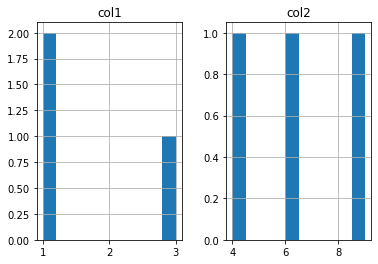

In [0]:
# 17. Fetching Dataframe Properties
df = pd.DataFrame({'col1': {'row1':1,'row2':1,'row3':3}, 'col2': {'row1':4,'row3':9,'row4':6}, 'col3': {'row1':10,'row2':8,'row4':6}})
print(df)
print("------------------")
count = df.count() # Returns a Series with column counts
count = df.count(axis=1) # Default to axis=0 (column counts), axis=1 gives row counts
m = df.min() # Returns a Series with the min for each column
m = df.max(axis=1) # Returns a Series with the min for each row
descr = df.describe() # Returns a DataFrame with the max, min, mean, etc. for each Column
n_most = df.nlargest(2,['col2']) # Returns the rows with the n largest values in specified column
n_most = df.nlargest(2,['col2','col3']) # Returns the rows with the n largest values in specified columns
n_most = df.nsmallest(2,['col1']) # Returns the rows with the n smallest values in specified column
idx = df.idxmax() # Returns a Series with a column by column breakdown of the rows with the largest values
idx = df.idxmax(axis=1) # Returns a Series with a row by row breakdown of the columns with the largest values
idx = df.idxmin() # Returns a Series with a column by column breakdown of the rows with the smallest values

idxs = df.index  # Returns an Index object with a list of index labels
cols = df.columns  # Returns an Index object with a list of column labels
dtypes = df.dtypes  # Returns a Series with datatypes for each column

# hist = df.hist() # Plots and displays a histogram of each column
hist = df.hist(column=['col1','col2']) # Plots and displays a histogram of specified columns

In [0]:
# 18. Adding, Combining, and Removing with DataFrames
df_1 = pd.DataFrame({'col1': {'row1':1,'row2':1,'row3':3}, 'col2': {'row1':4,'row3':9,'row4':6}, 'col3': {'row1':10,'row2':8,'row4':6}})
df_2 = pd.DataFrame({'col1': {'row1':10,'row4':6,'row3':9}, 'col2': {'row1':2,'row3':1,'row2':6}, 'col3': {'row3':7,'row2':6,'row4':0}})
print(df_1)
print(df_2)
print("--------------------")

# df_1['col4'] = [1,2,3,4] # Adds a column to the original df_1 if col4 does not exist or replace values if it does
# # df_1['col4'] = pd.Series({'a':1,'b':2}) # Adds a column but fills in NaN because index labels are different
# df_1.loc['row5'] = [20,30,40,50] # Adds a row to df_1 if row5 does not exist and replaces values if it does
# df_1 = df_1.append(pd.Series([11,12,13,14],index=['col1','col2','col3','col4']),ignore_index=True) # Adds a row to the end of df_1

combined = df_1.combine_first(df_2) # Returns a DataFrame with all values of df_1 and any NaN filled in with values of df_2
combined = pd.concat([df_1,df_2]) # Sticks df_2 onto the end of df_1, may duplicate index labels

dropped = df_1.dropna(axis=1) # Returns a DataFrame with all rows with NaN removed (removes columns if axis=0)
dropped = df_1.drop(index=['row4'],columns=['col3']) # Returns a DataFrame without the specified rows and columns
del df_1['col2'] # Removes a column from df_1
popped = df_1.pop('col1') # Removes a column from df_1 and returns the column as a Series
print(popped)
print(df_1)

      col1  col2  col3
row1   1.0   4.0  10.0
row2   1.0   NaN   8.0
row3   3.0   9.0   NaN
row4   NaN   6.0   6.0
      col1  col2  col3
row1  10.0   2.0   NaN
row4   6.0   NaN   0.0
row3   9.0   1.0   7.0
row2   NaN   6.0   6.0
--------------------
row1    1.0
row2    1.0
row3    3.0
row4    NaN
Name: col1, dtype: float64
      col3
row1  10.0
row2   8.0
row3   NaN
row4   6.0


In [22]:
# 19. Modifying and restructuring DataFrames
df = pd.DataFrame({'col1': {'row1':1,'row2':1,'row3':3}, 'col2': {'row1':4,'row3':9,'row4':6}, 'col3': {'row1':10,'row2':8,'row4':6}})
print(df)
print("--------------------")

# Reassigning values
df['col1'] = [2.0,3,4,5] # Replaces the values in col1, must have the same number of elements as rows
df['col1'] = pd.Series({'row1':1,'row2':2,'row3':3,'row4':4}) # Replaces the values in col1, should have the same labels
df.loc['row1'] = [10,11,12] # Replaces the values in row1, must have the same number of elements as rows
df.loc['row1'] = pd.Series({'col1':1,'col2':2,'col3':3}) # Replaces the values in row1, should have the same labels
df = df.fillna(0) # Replaces all NaN values with 0
# Restructuring
restructured = df.reindex(columns=['col3','col2','col1']) # Rearranges columns
restructured = df.reindex(columns=['col1','col2','col3','col4']) # Adds a column and fills it with NaN
df.columns = ['1','2','3'] # Relabels columns
restructured = df.reindex(index=['row4','row3','row2','row1']) # Rearranges rows
restructured = df.reindex(index=['row4','row3','row2','row1','row0']) # Adds a row and fills it with NaN
df.index = ['r1','r2','r3','r4'] # Relabels rows
print(df)

      col1  col2  col3
row1   1.0   4.0  10.0
row2   1.0   NaN   8.0
row3   3.0   9.0   NaN
row4   NaN   6.0   6.0
--------------------
    1    2    3
r1  1  2.0  3.0
r2  2  0.0  8.0
r3  3  9.0  0.0
r4  4  6.0  6.0


In [43]:
# 20. DataFrame Operations
df = pd.DataFrame({'col2': {'row1':1,'row2':1,'row3':3}, 'col3': {'row1':4,'row3':9,'row4':6}, 'col1': {'row1':10,'row2':8,'row4':6}})
print(df)
print("--------------------")

# Arithmetic operations
result = df + 5 # Adds 5 to every element
result = df ** 2 # Squares every element
result = df.add(5,fill_value=0) # Adds 5 to every element, fills in NaNs with 0 then adds 5
# Applying functions
def f(x):
  return (2*x) + 5
result = df.apply(f) # Applies the function to every element in the DataFrame
result = df.transform(np.square) # Squares every element
result = df.transform(f) # Applies the function to every element
result = df.transform('square') # Squares every element
result = df.transform(lambda x: x**2) # Squares every element
result = df.transform([np.square,np.log]) # Creates subcolumns for each column, one with the square values, one with the log values
result = df.transform({'col1':np.square,'col2':np.log}) # Creates a DataFrame with just the two columns and the respective operations applied
# Transpose
result = df.transpose() # Switches row and column indexes
# Type casting
result = df.astype('object') # Casts all columns to object type
result = df.astype(np.float16) # Casts all columns to float 16 type
# Sorting
result = df.sort_index(axis=0, ascending=False) # Returns DataFrame sorted by row label greatest to least
result = df.sort_index(axis=1, ascending=False) # Returns DataFrame sorted by column label greatest to least
result = df.sort_values('col3',axis=0,ascending=False) # Returns DataFrame with rows sorted by values in col3 from greatest to least
result = df.sort_values('row2',axis=1,ascending=False) # Returns DataFrame with columns sorted by values in row2 from greatest to least
print(result)

      col2  col3  col1
row1   1.0   4.0  10.0
row2   1.0   NaN   8.0
row3   3.0   9.0   NaN
row4   NaN   6.0   6.0
--------------------
      col1  col2  col3
row1  10.0   1.0   4.0
row2   8.0   1.0   NaN
row3   NaN   3.0   9.0
row4   6.0   NaN   6.0


In [58]:
# 21. DataFrame Comparisons and Iterations
df_1 = pd.DataFrame({'col1': {'row1':1,'row2':1,'row3':3}, 'col2': {'row1':4,'row3':9,'row4':6}})
df_2 = pd.DataFrame({'col1': {'row1':2,'row2':5,'row3':1}, 'col2': {'row1':5,'row3':8,'row4':6}})
print(df_1)
print(df_2)
print("---------------")

# Comparisons
gt = df_1 > df_2 # Returns a DataFrame with True/False values depending on the comparison of individual elements
gt = df_1.gt(df_2) # ge, gt, le, lt, eq, ne
eq = df_1.equals(df_2) # Returns true if all elements are equal across DataFrames
gt = df_1['col1'] > df_2['col1'] # Returns a Series with True/False values depending on the comparison of individual elements
gt = df_1['col1'].gt(df_2['col1']) # Returns a Series with True/False values depending on the comparison of individual elements
gt = df_1.loc['row1'] > df_2.loc['row1'] # Returns a Series with True/False values depending on the comparison of individual elements
gt = df_1.loc['row1'].gt(df_2.loc['row1']) # Returns a Series with True/False values depending on the comparison of individual elements
# Iteration
# for col in df_1: # Iterates through column names
#   print(col)
# for row in df_1.index: # Iterates through row names
#   print(row)
# for col_name, row_value in df_1.items(): # Iterates through columns, col_name is the column label and row_value is a Series with the column data
#   print(col_name)
#   print(row_value)
#   print("-----")
for row_name, col_value in df_1.iterrows(): # Iterates through rows, row_name is the row label and column_value is a Series with the row data
  print(row_name)
  print(col_value)
  print("-----")

      col1  col2
row1   1.0   4.0
row2   1.0   NaN
row3   3.0   9.0
row4   NaN   6.0
      col1  col2
row1   2.0   5.0
row2   5.0   NaN
row3   1.0   8.0
row4   NaN   6.0
---------------
row1
col1    1.0
col2    4.0
Name: row1, dtype: float64
-----
row2
col1    1.0
col2    NaN
Name: row2, dtype: float64
-----
row3
col1    3.0
col2    9.0
Name: row3, dtype: float64
-----
row4
col1    NaN
col2    6.0
Name: row4, dtype: float64
-----
